In [11]:
#necessary imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import math
import os
import cv2
import random
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install patool # Installing patool for better zip file handling

import patoolib
from google.colab import drive
drive.mount('/content/drive')

#resizing images
target_size = (128, 128)

# Unzip the archive.zip file
# Assuming archive.zip is in 'My Drive' and you want to extract it to '/content/natural_images'
zip_file_path = '/content/drive/My Drive/archive.zip'
extraction_path = '/content/natural_images'

patoolib.extract_archive(zip_file_path, outdir=extraction_path)

#generation for training and validation with normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Path to the image data after extraction
train_data_dir = '/content/natural_images/data/natural_images'

val_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 4.0 MB/s eta 0:00:00


INFO patool: Extracting /content/drive/My Drive/archive.zip ...
INFO:patool:Extracting /content/drive/My Drive/archive.zip ...


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


INFO patool: ... creating output directory `/content/natural_images'.
INFO:patool:... creating output directory `/content/natural_images'.
INFO patool: running /usr/bin/7z x -aou -o/content/natural_images -- "/content/drive/My Drive/archive.zip"
INFO:patool:running /usr/bin/7z x -aou -o/content/natural_images -- "/content/drive/My Drive/archive.zip"
INFO patool: ... /content/drive/My Drive/archive.zip extracted to `/content/natural_images'.
INFO:patool:... /content/drive/My Drive/archive.zip extracted to `/content/natural_images'.


Found 1377 images belonging to 8 classes.
Found 5522 images belonging to 8 classes.


In [5]:
#building the cnn model
img_width, img_height = 128, 128

cnn = models.Sequential()

#first block
cnn.add(layers.Input(shape=(img_width, img_height, 3)))
cnn.add(layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding="same"))
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))

#max pooling to reduce dimensions
cnn.add(layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"))
cnn.add(layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"))
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"))
cnn.add(layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"))
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))

#connected layers
cnn.add(layers.Flatten())
cnn.add(layers.Dense(units=128, activation="relu"))
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(units=64, activation="relu"))
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(units=train_generator.num_classes, activation="softmax"))

#compiling the model using adam optimizer
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model built successfully!")

Model built successfully!


In [6]:
#training the data
history = cnn.fit(
    train_generator,
    validation_data = val_generator,
    epochs=20
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


173/173 ━━━━━━━━━━━━━━━━━━━━ 28s 104ms/step - accuracy: 0.1995 - loss: 2.0068 - val_accuracy: 0.4924 - val_loss: 1.5107
Epoch 2/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.4798 - loss: 1.4350 - val_accuracy: 0.6812 - val_loss: 0.9175
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.6386 - loss: 1.0253 - val_accuracy: 0.7328 - val_loss: 0.8667
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.7038 - loss: 0.8301 - val_accuracy: 0.7843 - val_loss: 0.6133
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.7216 - loss: 0.7287 - val_accuracy: 0.8134 - val_loss: 0.5249
Epoch 6/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.7614 - loss: 0.6014 - val_accuracy: 0.8264 - val_loss: 0.4689
Epoch 7/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.7891 - loss: 0.5325 - val_accuracy: 0.8504 - val_loss: 0.3762
Epoch 8/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.8118 - loss: 0.4882 - val_accuracy: 0.8

In [7]:
#compiling and summary for report
cnn.summary()
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,541,018 (108.88 MB)

 Trainable params: 9,513,672 (36.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,027,346 (72.58 MB)

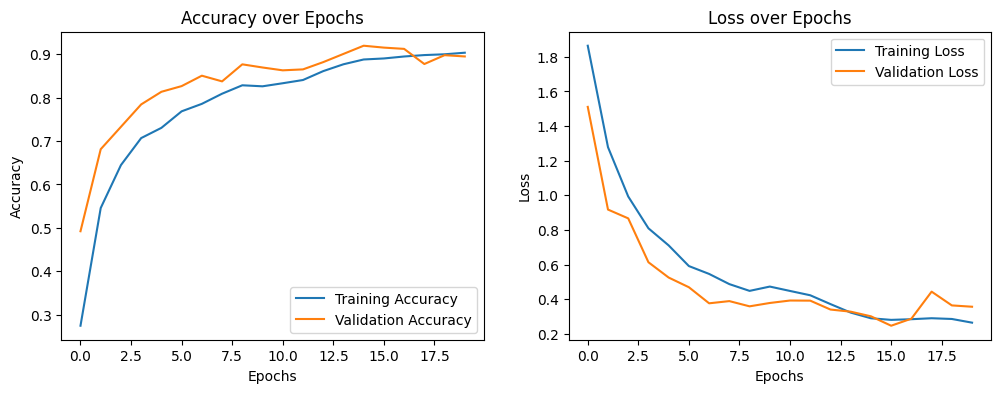

In [8]:
#plotting the the accuracy and loss
plt.figure(figsize=(12, 4))

#accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

#loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


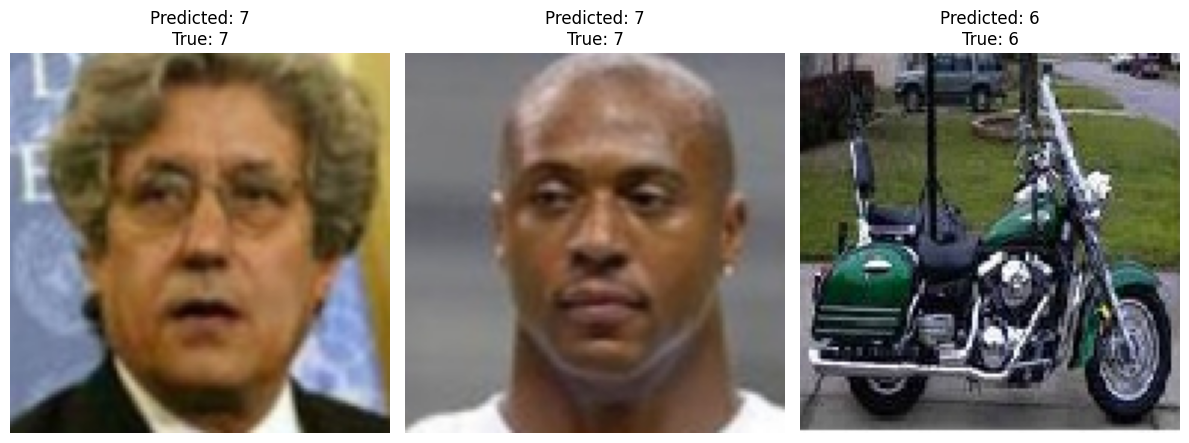

In [12]:
#showing the predicted values to the expected values
image_indices = list(range(len(val_generator.filenames)))
random_indices = random.sample(image_indices, 3)

#picking images at random
plt.figure(figsize=(12, 6))
for i, index in enumerate(random_indices):
    image, label = (
        val_generator[math.floor(index / val_generator.batch_size)][0][index % val_generator.batch_size],
        val_generator[math.floor(index / val_generator.batch_size)][1][index % val_generator.batch_size],
    )

    prediction = cnn.predict(np.expand_dims(image, axis=0))

    #plotting
    predicted_class = np.argmax(prediction)
    true_class = np.argmax(label)
    plt.subplot(1, 3, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class}\nTrue: {true_class}")

plt.tight_layout()
plt.show()


